## Практическое задание


Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким
образом, чтобы улучшить её точность. Проведите анализ — что приводит к ухудшению точности
нейронной сети? Что приводит к увеличению её точности?

In [1]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:

### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов

def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized
# преобразование массива в необходимый вид

def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))
    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr
# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))
# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)



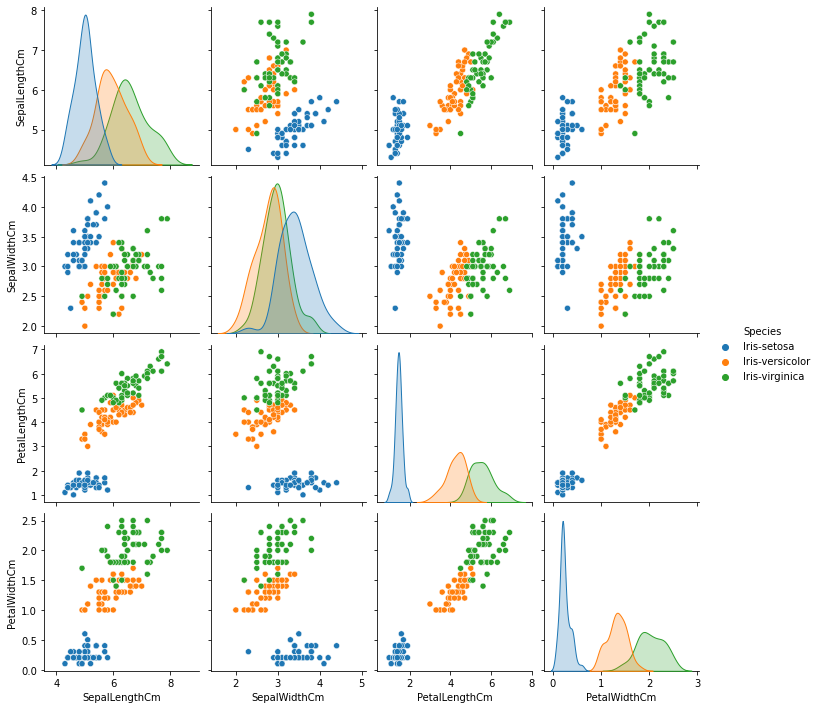

In [3]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных
# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть
# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)
# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)
# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)


### Базовый вариант

In [4]:
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя - 4 входа, 5 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
# скорость обучения (learning rate)
n = 0.1
# массив для ошибок, чтобы потом построить график
errors = []
# процесс обучения
for i in range(100000):
# прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

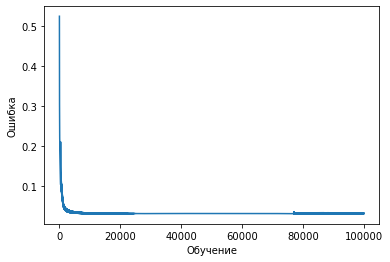

Точность нейронной сети 96.82%


In [5]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

### Меняем LR

In [6]:
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя - 4 входа, 5 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
# скорость обучения (learning rate)
n = 0.3
# массив для ошибок, чтобы потом построить график
errors = []
# процесс обучения
for i in range(100000):
# прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

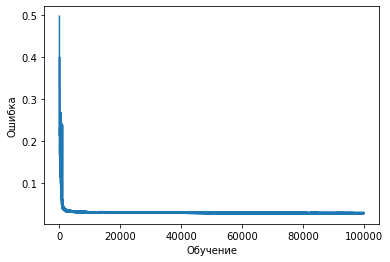

Точность нейронной сети 97.04%


In [7]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

- При повышении LR начинает не стабильно сходиться, но качество улучшилось.
- При понижении не успевает сойтись

### Изменяем количество эпох

In [8]:
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя - 4 входа, 5 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
# скорость обучения (learning rate)
n = 0.1
# массив для ошибок, чтобы потом построить график
errors = []
# процесс обучения
for i in range(1000000):
# прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

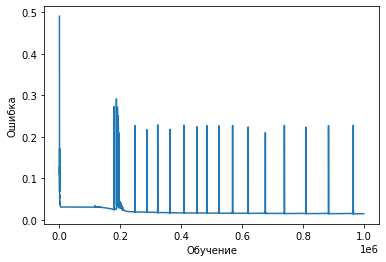

Точность нейронной сети 98.53%


In [9]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

- При повышении кол-ва эпох на 10^1 раз начинает не стабильно сходиться но результат улучшает не много.
- При понижении кол-ва эпох на 10^1 раз не успевает сойтись

### Изменяем размер промежуточного слоя

In [10]:
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
w0 = 2*np.random.random((4, 50)) - 1 # для входного слоя - 4 входа, 5 выхода
w1 = 2*np.random.random((50, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
# скорость обучения (learning rate)
n = 0.1
# массив для ошибок, чтобы потом построить график
errors = []
# процесс обучения
for i in range(100000):
# прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

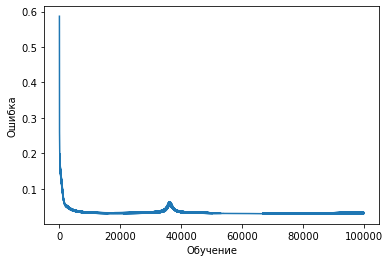

Точность нейронной сети 96.95%


In [11]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

- Тут можем только увеличивать. При увеличении в 10 раз, качество не улучшилось.

### Изменяем размер промежуточного слоя + настройка LR + настройка эпох

In [12]:
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
w0 = 2*np.random.random((4, 50)) - 1 # для входного слоя - 4 входа, 5 выхода
w1 = 2*np.random.random((50, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
# скорость обучения (learning rate)
n = 0.2
# массив для ошибок, чтобы потом построить график
errors = []
# процесс обучения
for i in range(1000000):
# прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

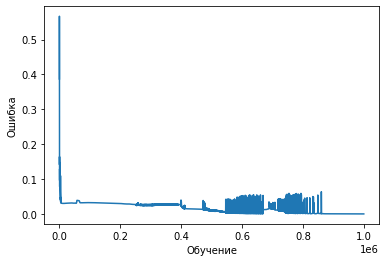

Точность нейронной сети 99.98%


In [13]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

- Увеличив все разом, качество улучшилось, но обучение было не стабильным. судя по графику.

### Другая функция активации (ReLu / LeakyReLu)

In [14]:
def relu(x):
    return np.maximum(0.0, x)   

def relu_deriv(x):
    return (x > 0) * 1

In [15]:
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
w0 = 2*np.random.random((4, 50)) - 1 # для входного слоя - 4 входа, 5 выхода
w1 = 2*np.random.random((50, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
# скорость обучения (learning rate)
n = 0.01
# массив для ошибок, чтобы потом построить график
errors = []
# процесс обучения
for i in range(1000000):
# прямое распространение(feed forward)
    layer0 = X_train
    layer1 = relu(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * relu_deriv(layer1)
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

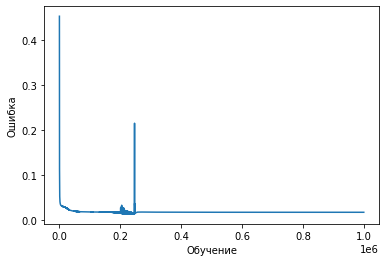

Точность нейронной сети 98.25%


In [16]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

In [17]:
def lrelu(x):
    return np.maximum(0.1*x, x)   

def dlrelu(x, alpha=0.01):
    dx = np.ones_like(x)
    dx[x < 0] = alpha
    return dx

In [18]:
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
w0 = 2*np.random.random((4, 50)) - 1 # для входного слоя - 4 входа, 5 выхода
w1 = 2*np.random.random((50, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
# скорость обучения (learning rate)
n = 0.01
# массив для ошибок, чтобы потом построить график
errors = []
# процесс обучения
for i in range(1000000):
# прямое распространение(feed forward)
    layer0 = X_train
    layer1 = lrelu(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * dlrelu(layer1)
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

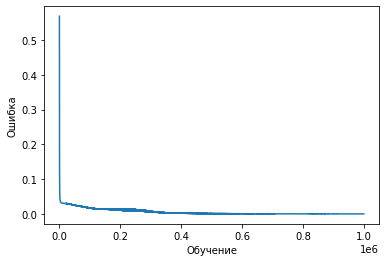

Точность нейронной сети 99.97%


In [19]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

- LeakyReLU стала победителем) Качество 99.96. Надо думать сетка переобучилась.

### Попробуем добавить еще 1 слой.

In [20]:
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
w0 = 2*np.random.random((4, 50)) - 1 # для входного слоя - 4 входа, 5 выхода
w1 = 2*np.random.random((50, 30)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
w2 = 2*np.random.random((30, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
# скорость обучения (learning rate)
n = 0.01
# массив для ошибок, чтобы потом построить график
errors = []
# процесс обучения
for i in range(1000000):
# прямое распространение(feed forward)
    layer0 = X_train
    layer1 = lrelu(np.dot(layer0, w0))
    layer2 = lrelu(np.dot(layer1, w1))
    layer3 = sigmoid(np.dot(layer2, w2))
    layer3_error = y_train - layer3
    layer3_delta = layer3_error * sigmoid_deriv(layer3)
    layer2_error = layer3_delta.dot(w2.T)
    layer2_delta = layer2_error * dlrelu(layer2)
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * dlrelu(layer1)
    w2 += layer2.T.dot(layer3_delta) * n
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    error = np.mean(np.abs(layer3_error))
    errors.append(error)
    accuracy = (1 - error) * 100

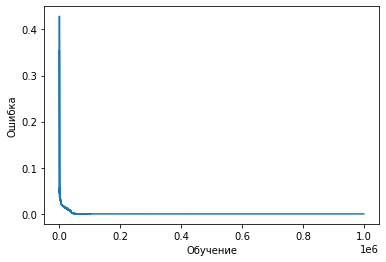

Точность нейронной сети 100.0%


In [21]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

- Ура, 100%! =)

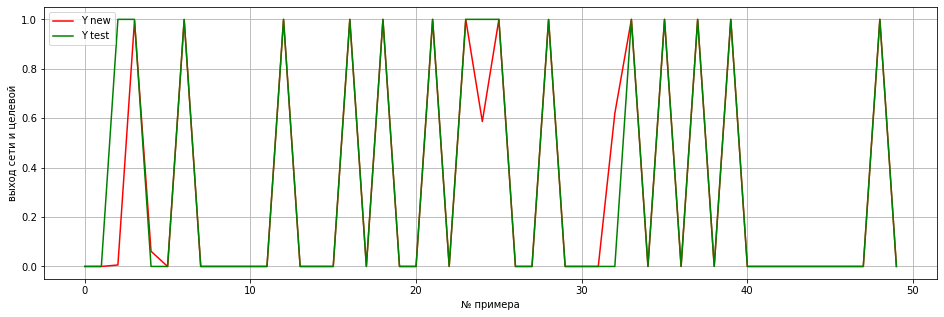

Аккуратность нейронной сети на тесте 97.16%


In [23]:


# прямое распространение (feet forward)
layer0_t = X_test
layer1_t = lrelu(np.dot(layer0_t, w0))
layer2_t = lrelu(np.dot(layer1_t, w1))
layer3_t = sigmoid(np.dot(layer2_t, w2))
layer3_error_t = y_test - layer3_t 

N = 50

plt.figure(figsize=(16, 5))
plt.plot(layer3_t[:N, 1], 'r', label = 'Y new')
plt.plot(y_test[:N, 1], 'g', label = 'Y test')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.grid()
plt.show() # раскомментируйте, чтобы посмотреть.

# метрика модели
error_t = np.mean(np.abs(layer3_error_t))
accuracy_t = (1 - error_t) * 100


print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t, 2)) + "%")